In [1]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Graficos
import matplotlib.pyplot as plt

# Preprocessing y modelo
from numpy import linalg as LA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [2]:
# IMportacion de la base de datos
df = pd.read_csv("iris.csv")
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
# Estandarizacion de las variables
df2 = StandardScaler().fit_transform(df.iloc[:, :4])
df2

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [4]:
index = df.index
renglones = len(index)

# Calculo de la matriz de correlaciones para la matriz transformada
A = (1/renglones) * np.dot(df2.T, df2)
A

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [5]:
# Entrenamiento del modelo PCA con escalado de los datos
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df.iloc[:, :4])

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [6]:
# Eigenvalores 
print("Eigenvalores:")
results = LA.eigvals(A)
print(results)

Eigenvalores:
[2.91849782 0.91403047 0.14675688 0.02071484]


In [7]:
# Se extrae el modelo entrenado del pippeline
modelo_pca = pca_pipe.named_steps['pca']

# Porcentaje de la varianza explicada por cada nuevo componente
print("Porcentaje de varianza explicada por componente")
print(modelo_pca.explained_variance_ratio_)

Porcentaje de varianza explicada por componente
[0.72962445 0.22850762 0.03668922 0.00517871]


In [8]:
# Caluculo de los eigenvectores
print("Eigenvectores (por renglon):")
pd.DataFrame(data = modelo_pca.components_,
            columns = df.columns[:4],
            index = ['PC1', 'PC2', 'PC3', 'PC4'])

Eigenvectores (por renglon):


,sepal.length,sepal.width,petal.length,petal.width
PC1,0.521066,-0.269347,0.580413,0.564857
PC2,0.377418,0.923296,0.024492,0.066942
PC3,-0.719566,0.244382,0.142126,0.634273
PC4,-0.261286,0.123510,0.801449,-0.523597


In [9]:
# Proyecciones de los componentes 
proyecciones = np.dot(modelo_pca.components_, df2.T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2', 'PC3', 'PC4'])
proyecciones = proyecciones.transpose().set_index(df["variety"])
proyecciones

,PC1,PC2,PC3,PC4
variety,,,,
Setosa,-2.264703,0.480027,-0.127706,-0.024168
Setosa,-2.080961,-0.674134,-0.234609,-0.103007
Setosa,-2.364229,-0.341908,0.044201,-0.028377
Setosa,-2.299384,-0.597395,0.091290,0.065956
Setosa,-2.389842,0.646835,0.015738,0.035923
...,...,...,...,...
Virginica,1.870503,0.386966,0.256274,-0.389257
Virginica,1.564580,-0.896687,-0.026371,-0.220192
Virginica,1.521170,0.269069,0.180178,-0.119171


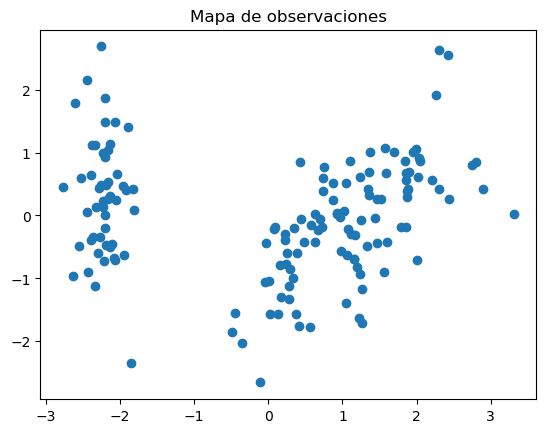

In [31]:
x = proyecciones.iloc[:, 0]
y = proyecciones.iloc[:, 1]
z = proyecciones.index
x = x.to_numpy()
y = y.to_numpy()

fig, ax = plt.subplots()
ax.set_title("Mapa de observaciones")
ax.scatter(x,y)

#for i, txt in enumerate(z):
#    ax.annotate(txt, (x[i], y[i]))

In [11]:
componentes_2 = pd.DataFrame(data = modelo_pca.components_,
                            columns = df.columns[:4],
                            index = ['PC1', 'PC2', 'PC3', 'PC4'])
componentes_2 = componentes_2.iloc[0:2, :]
componentes_2 = componentes_2.T
componentes_2

,PC1,PC2
sepal.length,0.521066,0.377418
sepal.width,-0.269347,0.923296
petal.length,0.580413,0.024492
petal.width,0.564857,0.066942


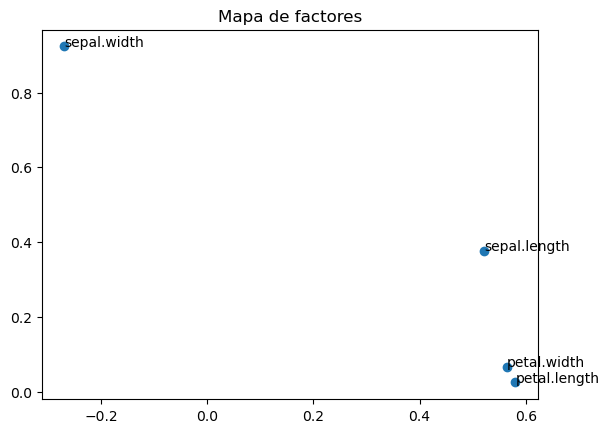

In [12]:
x = componentes_2.iloc[:, 0]
y = componentes_2.iloc[:, 1]
z = componentes_2.index
x = x.to_numpy()
y = y.to_numpy()

fig, ax = plt.subplots()
ax.set_title("Mapa de factores")
ax.scatter(x,y)

for i, txt in enumerate(z):
    ax.annotate(txt, (x[i], y[i]))